# Performing Decision Tree Machine Lerning Algorithm  to Predict the Weather

# Dataset is the Australian Dataset

## Importing all needed libraries and loading the dataset into Jupyter

In [2]:
#importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
import os

import warnings
warnings.filterwarnings('ignore')

#file directory
os.chdir (r"C:\Users\LENOVO\Desktop\Digicap\data bank")

#Loading the csv data set file into jupyter
wdf = pd.read_csv('weatherAUS.csv')

## Examining and Cleaning the data and performing EDA

In [3]:
#getting the first five rows
wdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#getting the last 5 rows
wdf.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#Describing the raw data set
wdf.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
#getting the number of entries by rows x columns
print('Your data structure is',wdf.shape,'in rows by columns')

Your data structure is (145460, 23) in rows by columns


In [7]:
#Replacing  all NaN entries from the dataset with zero
cdf=wdf.fillna(0)
cdf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
#Replacing  all 0 entries from the RainToday and RainTomorrow columns with 
cdf['RainToday'] = np.where((cdf.RainToday  == 0), 'Yes', cdf.RainToday)
cdf['RainTomorrow'] = np.where((cdf.RainTomorrow == 0), 'No', cdf.RainTomorrow)
 

In [9]:
#Replacing  all  entries from the RainToday and RainTomorrow columns
#yes=1  no=0

cdf['RainToday'].replace(to_replace={'Yes':1, 'No':0,}, inplace=True)
cdf['RainTomorrow'].replace(to_replace={'Yes':1, 'No':0,}, inplace=True)

In [10]:
#Describing the clean data set
cdf.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,3.107787,3.957069,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405,0.241585,0.219146
std,6.482693,7.407808,8.389771,4.163070,4.680785,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396,0.428046,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.500000,17.800000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000,0.000000,0.000000
50%,11.900000,22.500000,0.000000,1.600000,0.100000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


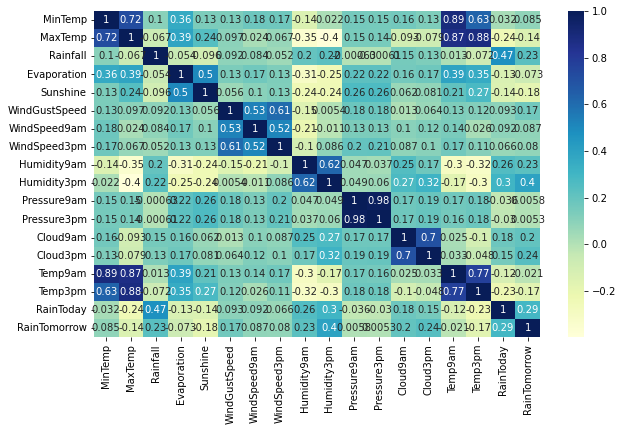

From the Hitmap, we can see that humidy at 3pm had the highest influence on the possibility of raining the next day.


In [11]:
#Generating a heatmap to show the corelation between the various attributes of the data
plt.figure(figsize = (10,6))
sns.heatmap(cdf.corr(), cmap='YlGnBu', annot=True)
plt.show()

#print('From the Hitmap, we can see that rainfall had the highest influence on the possibility of raining present day. and that is obvious.')
print('From the Hitmap, we can see that humidy at 3pm had the highest influence on the possibility of raining the next day.')

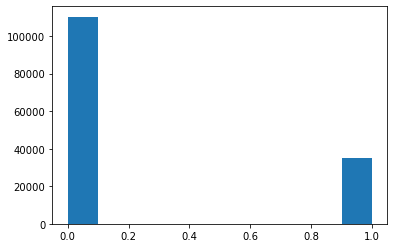

In [12]:
#Creating histogram for raining today
plt.hist(cdf['RainToday'])
plt.show()


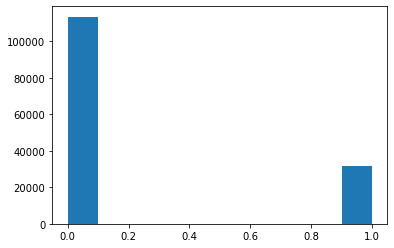

We can see from the histograms above that it rained fewer days in both the the present day and the next day


In [13]:
#Creating histogram for raining tomorrow
plt.hist(cdf['RainTomorrow'])
plt.show()

print('We can see from the histograms above that it rained fewer days in both the the present day and the next day')

In [14]:
#Getting all the names in the dataframe
print('The data set contains the following attributes:',cdf.columns)

The data set contains the following attributes: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


### Feature Selection to select the columns for the model

In [24]:
#Attributes to be used as input variables
x=cdf[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]

#Attributes to be used as ouput variables
y=cdf[['RainTomorrow']]

In [25]:
#getting the first five inputs
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [26]:
#Getting the first five RainToday 
y.head(5)

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [27]:
print('The output variable for today is only',y.RainTomorrow.unique(),'which represents No and Yes respectively')


The output variable for today is only [0 1] which represents No and Yes respectively


In [28]:
#print('The output variable for tomorrow is also',y1.RainTomorrow.unique(),'which represents No and Yes respectively')


### Spliting the data set into train data and test data and Training the Model

In [29]:
#splitting into train and test for both x and y, Today's rain
#train size is 80% and test size is 20%
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=.80, random_state=0)

#Getting the shape the split parts
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116368, 17)
(29092, 17)
(116368, 1)
(29092, 1)


In [30]:
#splitting into train and test for both x and y, Tomorrow's rain
#train size is 80% and test size is 20%
#x_train, x_test, y_train, y_test=train_test_split(x,y1,train_size=.80, random_state=1)

#Getting the shape the split parts
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116368, 17)
(29092, 17)
(116368, 1)
(29092, 1)


In [31]:
#Training the model
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [33]:
#Predicting the accuracy of the score in percentage for the possibility of raining the next day
print('Your model is',round(model.score(x,y)*100,2),'% accurate for RainTomorrow')

Your model is 95.73 % accurate for RainTomorrow


## Predicting the Model

In [34]:
#Predicting rain today
print('There will be',model.predict([[13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0]]),'rain tomorrow')

There will be [0] rain tomorrow


In [35]:
#Generating a Confusion Matrix to study true positive, true negative, false positive and false negative
y_pred=model.predict(x_test)

In [39]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('The model is able to predict 19,506 true positives, 3,385 true negatives, 2,981 false positives and 3,220 false negatives according the confusion matrix')

[[19506  3220]
 [ 2981  3385]]
The model is able to predict 19,506 true positives, 3,385 true negatives, 2,981 false positives and 3,220 false negatives according the confusion matrix
